# A hands-on Machine Learning Introduction in Python with scikit-learn

## What is Machine Learning


Machine learning is the process of **extracting knowledge from data** automatically.

The goals usually include making predictions on new, unseen data or simply understanding given data better by finding patterns.

Central to machine learning is the concept of **automating decision making** from data **without the user specifying explicit rules** how this decision should be made.

<img src="raw/what_is_machine_learning.png" width="100%">

## Examples

<img src="raw/examples.png" width="100%">

## 3 Types of Machine Learning

<img src="raw/3_types_of_machine_learning.png" width="100%">

- **Supervised** (focus of this notebook): Each entry in the dataset comes with a "label". Examples are a list of emails where spam mail is already marked as such or a sample of handwritten digits. The goal is to use the historic data to make predictions.

- **Unsupervised**: There is no desired output associated with a data entry. In a sense, one can think of unsupervised learning as a means of discovering labels from the data itself. A popular example is the clustering of customer data.

- **Reinforcement**: Conceptually, this can be seen as "learning by doing". Some kind of "reward function" tells how good a predicted outcome is. For example, chess computers are typically programmed with this approach.

## 2 Types of Supervised Learning

<img src="raw/classification_vs_regression.png" width="100%">

- **In classification, the label is discrete**, such as "spam" or "no spam" for emails.
Furthermore, labels are nominal (e.g., colors of something), not ordinal (e.g., T-shirt sizes in S, M, or L).


- **In regression, the labels are continuous**. For example, given a person's age, education, and position, infer his/her salary.

## Case study: Iris flower classification

<img src="raw/iris_data.png" width="100%">

## Python for scientific computing

Python itself does not come with any scientific algorithms implemented it. However, over time, many open source libraries emerged that are useful to build machine learning applications.

Among the popular ones are numpy (numerical computations, linear algebra), pandas (data processing), matplotlib (visualisations), and scikit-learn (machine learning algorithms).

First, import the libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

The following line is needed so that this Jupyter notebook creates the visiualizations in the notebook and not in a new window. This has nothing to do with Python.

In [2]:
%matplotlib inline

Standard Python can do basic arithmetic operations ...

In [3]:
a = 1
b = 2
c = a + b
c

3

... and provides some simple **data structures**, such as a list of values.

In [4]:
l = [a, b, c, 4]
l

[1, 2, 3, 4]

Numpy provides a data structure called an **n-dimensional array**. This may sound fancy at first but when used with only 1 or 2 dimensions, it basically represents vectors and matrices. Arrays allow for much faster computations as they use very low level functions modern computers provide.

To create an array, use the **array()** function from the imported **np** module and provide it with a list of values.

In [5]:
v1 = np.array([1, 2, 3])
v1

array([1, 2, 3])

A vector can be multiplied with a scalar.

In [6]:
v2 = v1 * 3
v2

array([3, 6, 9])

To create a matrix, just use a list of (row) list of values instead.

In [7]:
m1 = np.array([
    [1, 2, 3],
    [4, 5, 6],
])
m1

array([[1, 2, 3],
       [4, 5, 6]])

Now we can use numpy to multiply a matrix with a vector to obtain a new vector ...

In [8]:
v3 = np.dot(m1, v1)
v3

array([14, 32])

... or simply transpose it.

In [9]:
m1.T

array([[1, 4],
       [2, 5],
       [3, 6]])

The rules from maths still apply and it makes a difference if a vector is multiplied from the left or the right by a matrix. The following operation will fail.

In [10]:
np.dot(v1, m1)

ValueError: shapes (3,) and (2,3) not aligned: 3 (dim 0) != 2 (dim 0)

In order to retrieve only a slice (= subset) of an array's data, we can "index" into it. For example, the first row of the matrix is ...

In [11]:
m1[0, :]

array([1, 2, 3])

... while the second column is:

In [12]:
m1[:, 1]

array([2, 5])

To acces the lowest element in the right column, two indices can be used.

In [13]:
m1[1, 2]

6

Numpy also provides various other functions and constants, such as sinus or pi. To further illustrate the concept of **vectorization**, let us calculate the sinus curve over a range of values.

In [14]:
x = np.linspace(-3*np.pi, 3*np.pi, 100)
x

array([-9.42477796, -9.23437841, -9.04397885, -8.8535793 , -8.66317974,
       -8.47278019, -8.28238063, -8.09198108, -7.90158152, -7.71118197,
       -7.52078241, -7.33038286, -7.1399833 , -6.94958375, -6.75918419,
       -6.56878464, -6.37838508, -6.18798553, -5.99758598, -5.80718642,
       -5.61678687, -5.42638731, -5.23598776, -5.0455882 , -4.85518865,
       -4.66478909, -4.47438954, -4.28398998, -4.09359043, -3.90319087,
       -3.71279132, -3.52239176, -3.33199221, -3.14159265, -2.9511931 ,
       -2.76079354, -2.57039399, -2.37999443, -2.18959488, -1.99919533,
       -1.80879577, -1.61839622, -1.42799666, -1.23759711, -1.04719755,
       -0.856798  , -0.66639844, -0.47599889, -0.28559933, -0.09519978,
        0.09519978,  0.28559933,  0.47599889,  0.66639844,  0.856798  ,
        1.04719755,  1.23759711,  1.42799666,  1.61839622,  1.80879577,
        1.99919533,  2.18959488,  2.37999443,  2.57039399,  2.76079354,
        2.9511931 ,  3.14159265,  3.33199221,  3.52239176,  3.71

In [15]:
y = np.sin(x)
y

array([-3.67394040e-16, -1.89251244e-01, -3.71662456e-01, -5.40640817e-01,
       -6.90079011e-01, -8.14575952e-01, -9.09631995e-01, -9.71811568e-01,
       -9.98867339e-01, -9.89821442e-01, -9.45000819e-01, -8.66025404e-01,
       -7.55749574e-01, -6.18158986e-01, -4.58226522e-01, -2.81732557e-01,
       -9.50560433e-02,  9.50560433e-02,  2.81732557e-01,  4.58226522e-01,
        6.18158986e-01,  7.55749574e-01,  8.66025404e-01,  9.45000819e-01,
        9.89821442e-01,  9.98867339e-01,  9.71811568e-01,  9.09631995e-01,
        8.14575952e-01,  6.90079011e-01,  5.40640817e-01,  3.71662456e-01,
        1.89251244e-01, -1.22464680e-16, -1.89251244e-01, -3.71662456e-01,
       -5.40640817e-01, -6.90079011e-01, -8.14575952e-01, -9.09631995e-01,
       -9.71811568e-01, -9.98867339e-01, -9.89821442e-01, -9.45000819e-01,
       -8.66025404e-01, -7.55749574e-01, -6.18158986e-01, -4.58226522e-01,
       -2.81732557e-01, -9.50560433e-02,  9.50560433e-02,  2.81732557e-01,
        4.58226522e-01,  

With matplotlib's **plot()** function we can visualize the sinus curve.

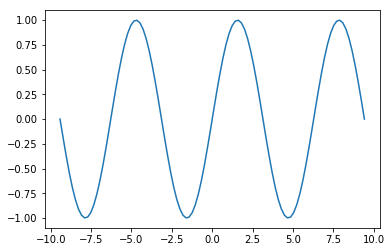

In [16]:
plt.plot(x, y)

Let us quickly generate some random data and draw a scatter plot.

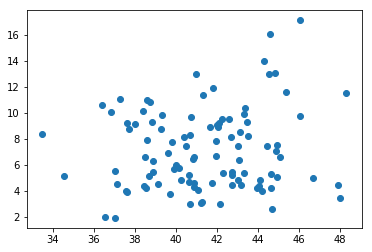

In [17]:
x = np.random.normal(42, 3, 100)
y = np.random.gamma(7, 1, 100)
plt.scatter(x, y)

# Case study: importing the Iris data

The sklearn library provides several sample datasets, among which is also the Iris dataset.

As a table, the dataset would look like:
<img src="raw/iris.png" width="100%">

However, the data object imported from sklearn is organized slightly different. In particular, the so-called **features** are seperated from the **labels**.

In [18]:
from sklearn.datasets import load_iris
iris = load_iris()

Using Python's **dir()** function we can inspect the data object, i.e. find out what **attributes** it has.

In [19]:
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

iris.data provides us with a Numpy array, where the first dimension equals the number of observed flowers (**instances**) and the second dimension lists the various features of a flower.

In [20]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

To find out what the four features are, we can list them:

In [21]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

Similarly, we can also print the flowers' labels (a.k.a. targets):

In [22]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

The three flower classes are encoded with integers. Let's show the corresponding names:

In [23]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## Case study: Simple visualizations

Since the data is four dimensional, we cannot visualize all features together. Instead, we can plot the distribution of the flower classes by a single feature using histograms.

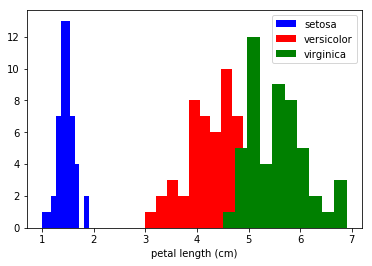

In [24]:
feature_index = 2
colors = ['blue', 'red', 'green']

for label, color in zip(range(len(iris.target_names)), colors):
    plt.hist(iris.data[iris.target==label, feature_index], 
             label=iris.target_names[label],
             color=color)

plt.xlabel(iris.feature_names[feature_index])
plt.legend(loc='upper right')
plt.show()

Also, we can draw scatter plots of two features.

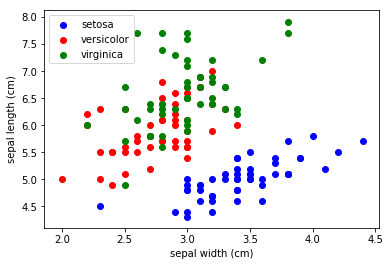

In [25]:
first_feature_index = 1
second_feature_index = 0

colors = ['blue', 'red', 'green']

for label, color in zip(range(len(iris.target_names)), colors):
    plt.scatter(iris.data[iris.target==label, first_feature_index], 
                iris.data[iris.target==label, second_feature_index],
                label=iris.target_names[label],
                c=color)

plt.xlabel(iris.feature_names[first_feature_index])
plt.ylabel(iris.feature_names[second_feature_index])
plt.legend(loc='upper left')
plt.show()

Using the higher level library pandas, one can easily create a so-called **scatterplot matrix**.

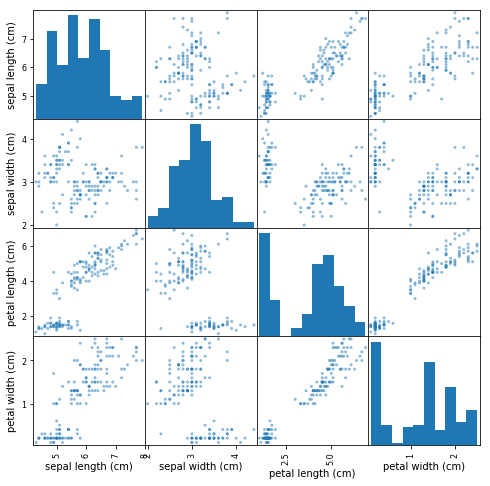

In [26]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
pd.plotting.scatter_matrix(iris_df, figsize=(8, 8));

## Concept of Generalization

The goal of a supervised machine learning model is to make predictions on new (i.e., previously unseen) data.

In a real-world application, we are not interested in marking an already labeled email as spam or not. Instead, we want to make the user's life easier by automatically classifying new incoming mail.

In order to get an idea of how good a model generalizes, a best practice is to split the available data into a training and a test set. Only the former is used to train the model. Then predictions are made on the test data and the predictions can be compared with the actual labels.

Common splits are 75/25 or 60/40.

<img src="raw/generalization.png" width="100%">

## Case study: Train/Test split for the Iris data

It is common practice to refer to the feature matrix as X and the vector of labels as y.

In [27]:
X, y = iris.data, iris.target

A naive splitting approach could be to use array slicing.

In [28]:
X_train, X_test, y_train, y_test = X[0:100, :], X[100:150, :], y[0:100], y[100:150]

However, this would lead to unbalanced label distributions. For example, the test set would only be made up of flowers of the same type.

In [29]:
y_test

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2])

In [30]:
np.bincount(y_test)

array([ 0,  0, 50])

sklearn provides a function that not only randomizes the split but also ensures that the resulting label distribution is proportionate to the overall distribution (called **stratification**).

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, stratify=y)
y_test

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 2, 1, 2, 2, 0, 0, 0, 0, 1, 0, 2, 2, 1,
       2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 0, 0, 2, 0, 2, 0, 2, 2, 2,
       0])

In [32]:
np.bincount(y_test)

array([15, 15, 15])

## A simple classification model: k-Nearest Neighbors

To predict the label for any observation, just determine the k "nearest" observations in the training set (e.g., by Euclidean distance) and use a simple majority vote.

<img src="raw/knn.png" width="100%">

## Case study: train and predict the Iris data

sklearn provides a uniform interface for all its classification models. They all have a **fit()** and a **predict()** method that abstract away the actual machine learning algorithm.

In [33]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

Let us list the labels predicted for the test set ...

In [34]:
y_pred

array([1, 0, 0, 0, 1, 0, 2, 0, 1, 2, 1, 2, 2, 0, 0, 0, 0, 1, 0, 2, 2, 1,
       2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 0, 0, 2, 0, 2, 0, 2, 2, 2,
       0])

... and compare them with the actual labels.

In [35]:
y_test

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 2, 1, 2, 2, 0, 0, 0, 0, 1, 0, 2, 2, 1,
       2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 0, 0, 2, 0, 2, 0, 2, 2, 2,
       0])

Numpy can show us the indices where the predictions are wrong.

In [36]:
np.where(y_pred != y_test)

(array([6]),)

Alternatively, we can calculate the fraction of correctly predicted flowers.

In [37]:
np.sum(y_pred == y_test) / len(y_test)

0.9777777777777777

It is important to mention that we can also "predict" the training set. Surprisingly, the model does not get the training set 100% correct.

In [38]:
y_train_pred = knn.predict(X_train)
np.sum(y_train_pred == y_train) / len(y_train)

0.9619047619047619

A visualization reveals that the misclassified flowers are right "at the borderline" between two neighboring clusters of flower classes.

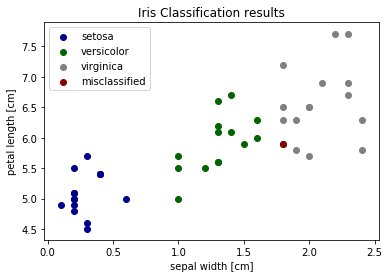

In [39]:
first_feature_index = 3
second_feature_index = 0

correct_idx = np.where(y_pred == y_test)[0]
incorrect_idx = np.where(y_pred != y_test)[0]

colors = ["darkblue", "darkgreen", "gray"]

for n, color in enumerate(colors):
    idx = np.where(y_test == n)[0]
    plt.scatter(X_test[idx, first_feature_index], X_test[idx, second_feature_index], color=color,
                label=iris.target_names[n])

plt.scatter(X_test[incorrect_idx, first_feature_index], X_test[incorrect_idx, second_feature_index],
            color="darkred", label='misclassified')

plt.xlabel('sepal width [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='best')
plt.title("Iris Classification results")
plt.show()

In practice, the number of neighbors is to chosen before the model is trained. Therefore, it is possible to "optimize" it. This process is referred to as **hyper-parameter** tuning. For the Iris dataset this does not make much of a difference.

In [40]:
for i in range(1, 31):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    correct = np.sum(y_pred == y_test) / len(y_test)
    print(i, correct)

1 0.9777777777777777
2 0.9555555555555556
3 0.9777777777777777
4 0.9777777777777777
5 0.9777777777777777
6 0.9777777777777777
7 0.9777777777777777
8 0.9777777777777777
9 0.9777777777777777
10 0.9777777777777777
11 0.9777777777777777
12 0.9777777777777777
13 0.9777777777777777
14 0.9777777777777777
15 0.9777777777777777
16 1.0
17 1.0
18 1.0
19 1.0
20 1.0
21 1.0
22 1.0
23 1.0
24 1.0
25 1.0
26 1.0
27 1.0
28 1.0
29 1.0
30 1.0


## Literature

Depending on the programming language one chooses, the following books are recommended.

- Python

<img src="raw/python_general.png">

<img src="raw/python_ml.png">

- R

<img src="raw/r.png">